# SNLP Assignment 5

Name 1: Daniya Niazi<br/>
Student id 1: 7062343<br/>
Email 1:  dani00003@stud.uni-saarland.de <br/>

Name 2: Zoha Zehra<br/>
Student id 2: 7061946<br/>
Email 2: zoze00001@stud.uni-saarland.de<br/>

Name 3: Aleksey Morshnev<br/>
Student id 3: 7042691<br/>
Email 3: almo00008@stud.uni-saarland.de<br/>

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook. There is no need to submit the data files. <br/>
Upload the zipped folder on CMS. Please follow the naming convention of **Name1_studentID1_Name2_studentID2_Name3_studentID3.zip**. Make sure to click on "Turn-in" (or the equivalent on CMS) after you upload your submission, otherwise the assignment will not be considered as submitted. Only one member of the group should make the submisssion.

---

## Notes!!

* Unless specified specifically, you only need to lowercase the text (training and test). You don't need to apply further preprocessing such as removing the punctuations.
* For theoretical answer, you always need to add some explanations. Generally, 1-3 sentences are enough.
* If you get math error or divide by zero error, try substituting 0 with an extremely small value like $1e-6$.
* For Q3, you can use the pre-trained BPE tokenizer from Q1 (i.e. `ex1.tokenize_bpe()`)
* In case you face some weird issue even if your implementation seems correct, try restarting the kernel and rerunning your code.
* If you face any problems with libraries (like Huggingface Transformers), try running the notebook on [Google Colab](https://colab.research.google.com/).
* **Make sure that you include the python scripts (exercise_1.py and exercise_2_and_3.py without \_pycache\_) along with your solution notebook in the submission zip file.**

## Exercise 1 - Tokenization (3 points)

In the lecture, we learnt about Byte-Pair Encodings (BPE) and Morfessor tokenizer. In this exercise, we'll use these tokenizers and see how they work. You are given a text file `moby_dick.txt` which you'll use to train the tokenizer, and then you'll tokenize the text in `burgess.txt` and compute the entropy of the tokenized text distribution.

---

### Solution 1

In [2]:
# For BPE use Huggingface Tokenizer library
# and for Morfesor use Morfessor library
# tqdm is for progress bar

!pip install tokenizers morfessor tqdm

In [1]:
!conda install -y morfessor tqdm tokenizers

Retrieving notices: ...working... done
done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.5.0



## Package Plan ##

  environment location: /home/reni/miniconda3/envs/hws_ws23

  added / updated specs:
    - morfessor
    - tokenizers
    - tqdm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2024.6.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    morfessor-2.0.6            |             py_1          31 KB  conda-forge
    openssl-3.3.1              |       h4ab18f5_0         2.8 MB  conda-forge
    tokenizers-0.19.1          |  py310h320607d_0         2.6 MB  conda-forge
    tqdm-4.66.4                

In [2]:
# Use this to train the tokenizer as well as the Language models
training_file = "data/moby_dick.txt"

# Tokenize the test text and compute the entropy
# and later perplexity using Language models
test_file = "data/burgess.txt"

In [3]:
# DO NOT CHANGE THE CODE BELOW
# Your solution should be implemented in the `exercise_1.py` file
# You might have to rerun this cell if you make changes to the `exercise_1.py` file
import  exercise_1
from importlib import reload

reload(exercise_1)

ex1 = exercise_1.TokenizerEntropy()

#### BPE tokenizer (1.5 point)

Let's start with BPE tokenizer. Byte Pair Encoding (BPE) is a subword tokenization method that iteratively merges the most frequent pair of bytes or characters in a text corpus to form new, longer subword units. This process continues until a specified vocabulary size is reached, balancing the trade-off between token granularity and vocabulary size. 

a. Train the BPE tokenizer on the `moby_dick.txt` file (in the cell below). You can use the built-in trainer from Huggingface tokenizers library (see: [docs](https://huggingface.co/docs/tokenizers/pipeline) and the imports below) (0.25 point)  
b. Complete the `tokenize_bpe()` function in `exercise_1.py`. (0.25 point)  
c. Complete the `get_probs()` function in `exercise_1.py`. (0.25 point)  
d. Complete the `compute_entropy` function in `exercise_1.py`. Then, compute the entropy of the tokenized distribution of `burgess.txt`. (0.25 point)  
e. Plot the zipf's plot for the tokenized text (rank vs probability/frequency). (0.25 point)  
f. What does the entropy of the tokenized text distribution mean? Explain in 2-3 sentences. (0.25 point)  

Note: Using the defaults for the parameters of BPE (like vocabulary size) is okay.

In [4]:
# For BPE
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace
from tokenizers.normalizers import Lowercase

# Train BPE model
# Using the default parameters is fine
# ====================================
# Your code here
# a, Training the BPE on moby_dick
tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
trainer = BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])
tokenizer.pre_tokenizer = Whitespace()
tokenizer.train(["data/moby_dick.txt"], trainer)
tokenizer.save("data/tokenizer_moby_dick.json")
moby_tokenizer = Tokenizer.from_file("data/tokenizer_moby_dick.json")
output = moby_tokenizer.encode("Hello, y'all! How are you moby tokenizer you have been tokenize?")
print("Moby Tokenizer from Hugging Face : ",output.tokens)

# ====================================

# Compute the entropy of the test text
test_text = open('data/burgess.txt').read().strip().lower()
bpe_entropy = ex1.compute_entropy(test_text, tokenizer)

print(f"BPE entropy: {bpe_entropy:.2f}")




Moby Tokenizer from Hugging Face :  ['Hell', 'o', ',', 'y', "'", 'all', '!', 'How', 'are', 'you', 'mo', 'by', 'token', 'izer', 'you', 'have', 'been', 'token', 'ize', '?']
BPE entropy: 8.21


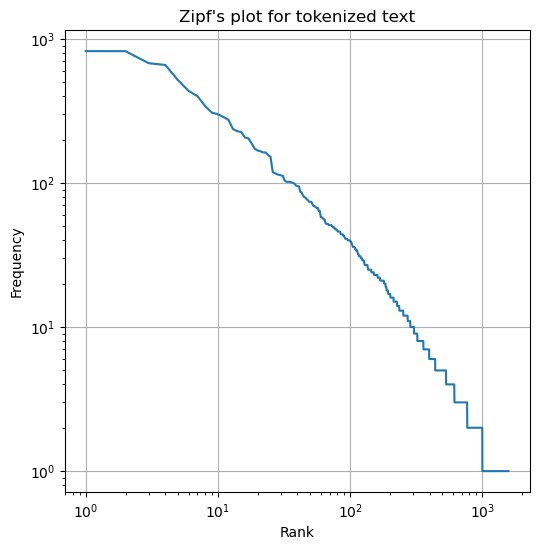

In [5]:
# Plot the zipf's line
import matplotlib.pyplot as plt
from collections import Counter

def analysis_loglog_zipfs_line(tokens):
    token_counts = Counter(tokens)

    # Sort tokens by frequency in descending order
    sorted_tokens = sorted(token_counts.items(), key=lambda item: item[1], reverse=True)

    # Extract frequencies and ranks
    frequencies = [count for _, count in sorted_tokens]
    ranks = list(range(1, len(frequencies) + 1))

    # Plot Zipf's plot
    plt.figure(figsize=(6, 6))
    plt.plot(ranks, frequencies)
    plt.xscale('log')
    plt.yscale('log')
    plt.title("Zipf's plot for tokenized text")
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
# ====================================
# Your code here
tokens = ex1.tokenize_bpe(tokenizer, test_text)
analysis_loglog_zipfs_line(tokens)

# ====================================

#### Morfessor tokenizer (1.5 point)

Now, we'll repeat the same for the Morfessor tokenizer. Morfessor is used for morphological segmentation or tokenization. You can read about Morfessor from this [report](https://aaltodoc.aalto.fi/items/8c912f1c-2b56-4c12-a60d-1c340aa24b01) and the [library documentation](https://morfessor.readthedocs.io/en/latest/general.html).

a. Train the Morfessor tokenizer on the `moby_dick.txt` file (in the cell below). (0.25 point)

   - The Morfessor tokenizer expects the training data to be a text file containing a list of words and it's frequency in the corpus (see below). Take the `moby_dick.txt` file, convert it into a list of words (you can simply split by spaces) and write it into `morfessor_training.txt` file.

     ```
        22 the
        1 hello
        4 is
        1 test-based
        ...
   - Run the cell below to train the morfessor model on this training data.
   
b. Complete the `tokenize_morfessor()` function in `exercise_1.py`. (0.5 point)  
c. Plot the zipf's plot for the tokenized text (rank vs probability/frequency). (0.25 point)  
d. Compute the entropy for the test set using Morfessor tokenizer. How does the entropy compare to BPE? (0.25)  
e. Based solely on the entropy, which tokenizer would you prefer? Explain in 2-3 sentences. (0.25)  

In [6]:
# For Morfessor
import morfessor

In [8]:
# Read the training file
# Convert it into a list of words (separate by whitespace)
# And, save it to a file called `morfessor_training.txt`
from collections import Counter

def generate_morfessor_file(path,out_path):
    # Read the content of the moby_dick.txt file
    text = open(path).read().strip().lower()

    # Tokenize the text by splitting it into words
    words = text.split()

    # Count the frequency of each word
    word_counts = Counter(words)

    # Write the word frequencies to a file in the format "frequency word"
    with open(out_path, "w", encoding="utf-8") as file:
        for word, frequency in word_counts.items():
            file.write(f"{frequency} {word}\n")

# ====================================
# Your code here
generate_morfessor_file("data/moby_dick.txt","morfessor_training.txt")
# ====================================

In [9]:
# Train Morfessor model using the morfessor_traininig.txt file
# and save the trained model as morfessor_model.bin
# We're using the morfessor-train command in the CLI with default arguments
# due to it's ease of use, you can also use the Morfessor API if you prefer

!morfessor-train morfessor_training.txt -s morfessor_model.bin

Reading corpus from 'morfessor_training.txt'...
Detected utf-8 encoding


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Done.
Compounds in training data: 17405 types / 17405 tokens
Starting batch training
Epochs: 0	Cost: 473318.3793392498
...........................................................
Epochs: 1	Cost: 378688.7938674032
...........................................................
Epochs: 2	Cost: 358368.42403119797
...........................................................
Epochs: 3	Cost: 355522.6115970379
...........................................................
Epochs: 4	Cost: 354722.8359034175
...........................................................
Epochs: 5	Cost: 354482.0334079743
...........................................................
Epochs: 6	Cost: 354444.7387124099
Done.
Epochs: 6
Final cost: 354444.7387124099
Training time: 24.040s
Saving model to 'morfessor_model.bin'...
Done.


In [10]:
# Using API - Training the morfssor
import morfessor
import math

# Load the training data
io = morfessor.MorfessorIO()
train_data = list(io.read_corpus_file('morfessor_training.txt'))

# Create and train the model
model = morfessor.BaselineModel()
model.load_data(train_data)
model.train_batch()

# Save the trained model
model_output_file = "morfessor_model.bin"
io.write_binary_model_file(model_output_file, model)

...........................................................
...........................................................
...........................................................
...........................................................
...........................................................


In [11]:
# Load the trained model
morfessor_model = io.read_binary_model_file(model_output_file)

# Compute the entropy of the test text
test_text = open(test_file).read().strip().lower()
morfessor_entropy = ex1.compute_entropy(test_text, tokenizer=morfessor_model)

print(f"Morfessor entropy: {morfessor_entropy:.2f}")

Morfessor entropy: 7.81


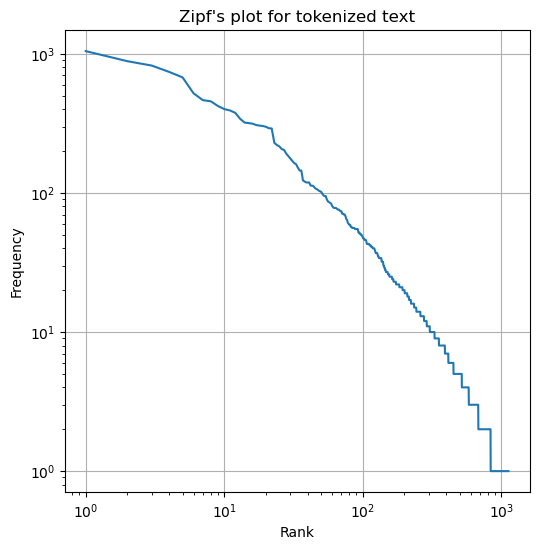

In [12]:
# Plot the zipf's line
import matplotlib.pyplot as plt

# ====================================
# Your code here
tokens = ex1.tokenize_morfessor(morfessor_model, test_text)
analysis_loglog_zipfs_line(tokens)
# ====================================

## Exercise 2 - Maximum Likelihood Estimate (3 points)

### Estimating the Maximum likelihood from a given text

a. Consider the formula on Page 31 in Chapter 2. 

$$P(w_2 | w_1) = \frac{P(w_1,w_2)}{P(w_1)}$$

To actually estimate these n-gram probabilities over a text corpus, we use **Maximum Likelihood Estimation (MLE)**. The estimate for the parameters of the MLE is obtained by getting counts from the corpus and then normalising them so they lie between 0 and 1.

Using this, state the empirical formula for finding the conditional probability of unigrams $P(w)$, bigrams $P(w_2|w_1)$, and trigrams $P(w_3|w_1,w_2)$ for a corpus of N words. We do not expect any mathematical proof here, but just the formula for finding the conditional probabilities from the words in the corpus using the shown equation as the starting point. (0.5 point)

b. Check the following small corpus of text. (0.25 point)

> &lt;s> I am learning the SNLP course. &lt;/s>  
&lt;s> The SNLP course is fun. &lt;/s>  
&lt;s> I am studying a lot of stuff. &lt;/s>  
&lt;s> I'm enjoying the fun topics. &lt;/s>

Now, using MLE, compute the probabilities for the following (assume we lowercase the corpus):  
i. `P(snlp|the)`  
ii. `P(learning|i am)`


### Does the choice of tokenizer have any effect on the Language model?
c. You are going to implement a general n-gram Language model in `exercise_2_and_3.py`. This takes `n_gram` as a parameter where `n_gram=2` would result in a bigram model.

   - Implement the `get_counts()` function in `exercise_2_and_3.py`. This function takes a list of tokens and `n` and calculates the frequency of each n-gram occurrence in the training set. (0.5 points)
   - Implement the `train()` function in `exercise_2_and_3.py`. This function takes a list of tokens, gets the counts of n-grams using the `get_counts()` function and saves the respective counts to `n_gram_counts`, `n_minus_1_gram_counts` and `unigram_counts` attribute of `LanguageModel`. Then, it computes the MLE estimates for each n-gram and saves it in the `prob` attribute of `LanguageModel` class. (0.5 points)
   - Implement the `perplexity()` function in `exercise_2_and_3.py`. This function takes a list of tokens (from the test set) and computes the perplexity on that text corpus. (0.5 points)
   - Train the model on `moby_dick.txt` using the BPE tokenizer (You can use the pre-trained BPE and the `ex1.tokenize_bpe()` function from Q1). Then, compute the perplexity on the `burgess.txt` file. (0.25 points)
   - Repeat above step but using Morfessor tokenizer. You can use the pre-trained Morfessor model and `ex1.tokenize_morfessor()` function form Q1. (0.25 points)

   NOTE: We cannot directly compare the perplexity of a language model that use different tokenizers since they can generate different number of tokens ([Read this](https://sjmielke.com/comparing-perplexities.htm)). A possible fix for this is normalizing the sum of log-probabilities with the number of words (in the text corpus you are evaluating) similar to computing the perplexity at the word level:
   $$PP = exp(-\frac{1}{num\_words} \sum_{i}^{n\_ngrams} log(p(w_i|h_i)))$$

d. How is the perplexity affected by the choice of tokenizer? What does it mean for each tokenizer? (0.25 points)

---

### Solution 2

##### Solution 2.a

The joint probability of a sequence of words $$  P(w_1, w_2, w_3 \ldots, w_n)  $$ can be expressed as the product of the conditional probabilities of each word given the previous word:

$$ P(w_1, w_2, \ldots, w_n) = \prod_{i=1}^{n} P(w_i \mid w_1,w_2, w_3,... w_{i-1}) $$

##### Unigram 
The probability of a unigram 𝑃(𝑤) is given by the count of the word (frequency of word ) 𝑤 divided by the total number of words 
𝑁 in the corpus.

$$ P(w) = \frac{C\left(w\right)}{N}$$


##### Bigram 

The joint probability of a sequence of words $$ P(w_1, w_2) $$ is:

$$ P(w_1, w_2) = \prod_{i=2}^{n} P(w_2 \mid w_1) $$

and the conditional probabilities of a words in the given coprus given the previous word is:

$$ P(w_i \mid w_{i-1}) = \frac{\text{count}(w_{i-1}, w_i)}{\text{count}(w_{i-1})} $$


$$ P(w_2 \mid w_1) = \frac{\text{count}(w_1, w_2)}{\text{count}(w_1)} $$

#### Trigram
The joint probability of a sequence of words $ P(w_1, w_2, w_3) $ is:

$$ P(w_1, w_2, w_3) = \prod_{i=3}^{n} P(w_3 \mid w_{1}, w_{2}) $$

The conditional probability of a word given the previous two words is:

$$ P(w_i \mid w_{i-2}, w_{i-1}) = \frac{\text{count}(w_{i-2}, w_{i-1}, w_i)}{\text{count}(w_{i-2}, w_{i-1})} $$


$$ P(w_3 \mid w_1,w_2) = \frac{\text{count}(w_1, w_2,w_3)}{\text{count}(w_{1}, w_{2})} $$

#### N-gram
The joint probability of a sequence of words $$P(w_1, w_2, \ldots, w_n) $$ is:

$$ P(w_1, w_2, \ldots, w_n) = \prod_{i=n}^{N} P(w_i \mid w_{i-(n-1)}, \ldots, w_{i-2}, w_{i-1}) $$

The conditional probability of a word given the previous \( n-1 \) words is:

$$ P(w_i \mid w_{i-(n-1)}, \ldots, w_{i-2}, w_{i-1}) = \frac{\text{count}(w_{i-(n-1)}, \ldots, w_{i-2}, w_{i-1}, w_i)}{\text{count}(w_{i-(n-1)}, \ldots, w_{i-2}, w_{i-1})} $$




##### Solution 2.b

$$ count(the,snlp) = 2  $$
$$ count (the) = 3 $$

Now 

$$ P(snlp|the) =  \frac{\text count(the,snlp)} {count (the)} = \frac{2}{3} $$

Similary


$$ P(learning|i am) =  \frac{\text count(i,am,learning)} {count (i,am)} = \frac{1}{2} $$

In [13]:
# Solution 2.c
# DO NOT CHANGE THE CODE BELOW
# Your solution should be implemented in the `exercise_2_and_3.py` file
# You might have to rerun this cell if you make changes to the `exercise_2_and_3.py` file

import exercise_2_and_3
from importlib import reload

reload(exercise_2_and_3)

<module 'exercise_2_and_3' from '/home/reni/Documents/hws_ss24/snlp_5/exercise_2_and_3.py'>

#### Using BPE

In [14]:
# Define a bigram model
lm = exercise_2_and_3.LanguageModel(n_gram=2)

# Training the language model
# Remember you can use the pre-trained BPE tokenizer from Q1

# ====================================
# Your code here
test_text = open('data/burgess.txt'"").read().strip().lower()
moby_bpe_tokenizer = Tokenizer.from_file("data/tokenizer_moby_dick.json")
bpe_tokens = ex1.tokenize_bpe(moby_bpe_tokenizer, test_text)
lm.train(bpe_tokens)
# ====================================

In [15]:
# Computing Perplexity on test set

# ====================================
# Your code here
n_words = len(test_text.split())
lm.perplexity(bpe_tokens,n_words)
# ====================================

4.078656597846708

#### Using Morfessor

In [23]:
# Define a bigram model
lm = exercise_2_and_3.LanguageModel(n_gram=2)

# Training the language model
# Remember you can use the pre-trained Morfessor tokenizer from Q1
# ====================================
# Your code here
test_text = open('data/burgess.txt'"").read().strip().lower()
# Step 3: Load the Morfessor model
morfessor_model = io.read_binary_model_file(model_output_file)
# morfessor_model = morfessor.MorfessorIO().read_binary_model_file('data/morfessor_model.bin')
# morfessor_model = morfessor.BaselineModel("data/morfessor_model.bin")
morfessor_tokens = ex1.tokenize_morfessor(morfessor_model, test_text)
lm.train(morfessor_tokens)
# ====================================

In [24]:
# Computing Perplexity on test set

# ====================================
# Your code here
n_words = len(test_text.split())
lm.perplexity(morfessor_tokens,n_words)
# ====================================

4.5515386057332705

##### Solution 2.d

The perplexity is higher while using morfessor tokenizer. The lower perplexity (4.0786) suggests that the BPE tokenizer provides a more predictable and consistent tokenization for the language model. BPE tokenizer combines the most common pairs of bytes or characters, effectively capturing subwords and patterns, resulting in a more consistent token set. Morfessor tokenizer segment words into morphemes, capturing the meaningful elements of words while potentially creating a wider range of tokens which makes the perplexity higher (4.6260).

## Exercise 3 - Backing off Language Models (4 points)

a. Complete the `generate()` function in `exercise_2_and_3.py` that takes a history (tokenized list) and then predicts the most likely next token based on the calculated probability distribution. (0.5 point)  
b. Complete the `get_smoothed_probs()` function using the following formulas in `exercise_2_and_3.py`. (1 point) 
    $$P_{abs}(w_i|w_{i-1}) = \frac{max\{N(w_{i-1}, w_i) - d, 0\}}{\sum_{w^{'}} N(w_{i-1}, w^{'})} + \lambda(w_{i-1}) P_{abs}(w_i)$$
    $$P_{abs}(w_i) = \frac{max\{N(w_i)-d, 0\}}{\sum_{w^{'}} N(w^{'})} + \lambda(.) P_{unif}(w_i)$$
    $$\lambda(w_{i-1}) = \frac{d}{\sum_{w^{'}} N(w_{i-1}, w^{'})} N_{1+}(w_{i-1}, \cdot)$$
    $$\lambda(.) = \frac{d}{\sum_{w^{'}} N(w^{'})}N_{1+}$$   

Where,  
    $P_{unif}(w_i)$ is the uniform distribution over the number of unigrams.  
    $N_{1+}(w_{i-1}, \cdot)$ is the number of n-grams where $w_{i-1}$ occurs as history at least once.  
    $N_{1+}$ is the number of unigrams that occur at least once i.e. simply the number of unigrams in the `unigram_counts`.  
    
c. Complete the `generate_absolute_smoothing()` function in `exercise_2_and_3.py`. (0.5 point)  

d. Initialize a bigram language model (`n_gram=2`). Train it on `moby_dick.txt` (use BPE Tokenizer). Generate a continuation for "_The computer_" (i.e. $w_{i-1}=$ _The computer_) for 5 tokens using the `generate()` function. What did you get? Now, generate continuation for it using the `generate_absolute_smoothing()` function. What did you get now? (0.5 points)  

e. We want to find the optimal discounting parameter $d$. For this, let's use cross-validation. Take the `moby_dick.txt` file and split it into a training (95%) and validation set (5%). Now, for $d$ in [0.1, 0.3, 0.5, 0.7, 0.9, 1.0], initialize a new bigram model, train it on the training set (use BPE tokenizer) and compute the perplexity on the validation set. Select the discount parameter that has the optimal perplexity. Also, plot the discounting parameter vs perplexity plot to see how perplexity is affected by the discounting parameter.(0.5 point)  

f. Now, using the optimal discount parameter, compute the perplexity on the `burgess.txt`. (0.25 point)  

g. From the lecture (chapter 5, slide 49), we know the approximate solution for the optimal discounting parameter is,
   $$d = \frac{N_1}{N_1 + 2N_2}$$

   For now, simply use the n-gram counts computed from the training set in Q3.d to compute $N_1$ and $N_2$. Then, using the optimal $d$ compute the perplexity on the `burgess.txt`. (0.5 point)  
   
h. How did the optimal value of $d$ (from 3.g) compare to the one you computed in Q3.e? And, how did it affect perplexity? (0.25 point)

---

### Solution 3

In [54]:
# Solution Q3

# DO NOT CHANGE THE CODE BELOW
# Your solution should be implemented in the `exercise_2_and_3.py` file
# You might have to rerun this cell if you make changes to the `exercise_2_and_3.py` file

import exercise_2_and_3
from importlib import reload

reload(exercise_2_and_3)

<module 'exercise_2_and_3' from '/home/reni/Documents/hws_ss24/snlp_5/exercise_2_and_3.py'>

In [42]:
# Solution 3.d
# Define a bigram model
lm = exercise_2_and_3.LanguageModel(n_gram=2)

# Training the language model
training_text = open(training_file).read().lower().strip()

tokens = ex1.tokenize_bpe(tokenizer, training_text)

print("No. of tokens: ", len(tokens))

lm.train(tokens)

No. of tokens:  260819


In [43]:
# Solution 3.d
# Generating text using ngram probabilities
# with seen n-grams
history = "Captain Ahab went"

tokens = ex1.tokenize_bpe(tokenizer, history)
print("Tokens: ", tokens)

for _ in range(5):
    next_token = lm.generate(tokens)
    tokens.append(next_token)

print(tokens)

Tokens:  ['captain', 'ahab', 'went']
['captain', 'ahab', 'went', 'to', 'the', 'whale', ',', 'and']


In [47]:
# Solution 3.d
# Generating text using ngram probabilities
# with unseen n-grams
history = "The computer"

tokens = ex1.tokenize_bpe(tokenizer, history)
print("Tokens: ", tokens)

for _ in range(5):
    next_token = lm.generate(tokens)
    tokens.append(next_token)

print(tokens)

Tokens:  ['the', 'captain']
['the', 'captain', 'ahab', ',', 'and', 'the', 'whale']


In [48]:
# Solution 3.d
# Generating text using smoothed probabilities
# Note: This might take a few minutes
history = "The computer"

tokens = ex1.tokenize_bpe(tokenizer, history)
print("Tokens: ", tokens)

for _ in range(5):
    next_token = lm.generate_absolute_smoothing(tokens)
    tokens.append(next_token)

print(tokens)

Tokens:  ['the', 'comp', '##ute', '##r']
['the', 'comp', '##ute', '##r', None, None, None, None, None]


In [55]:
# Solution 3.e

# Finding the optimal value of d using cross validation

import math

moby_tokenizer = Tokenizer.from_file("data/tokenizer_moby_dick_wordpiece.json")

# Load and prepare the training text
with open(training_file, 'r', encoding='utf-8') as file:
    training_text = file.read().lower().strip()
    # Tokenize using the provided BPE tokenizer
    tokens = ex1.tokenize_bpe(tokenizer, training_text)

# Split the tokens into training and validation sets
split_index = int(0.95 * len(tokens))
training_tokens = tokens[:split_index]
validation_tokens = tokens[split_index:]

# Estimating optimal d
d_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
pp_values = []

min_pp = math.inf
best_d = None

for d in d_values:
    # Initialize a new bigram language model
    lm = exercise_2_and_3.LanguageModel(n_gram=2)
    # Train the model on the training tokens
    lm.train(training_tokens)
    # Compute perplexity on the validation set
    pp = lm.perplexity(validation_tokens, len(validation_tokens), d)
    pp_values.append(pp)

    # Track the best d based on minimum perplexity
    if pp < min_pp:
        min_pp = pp
        best_d = d

    print(f"For d={d}, Perplexity={pp}")

For d=0.1, Perplexity=661.9270219971829
For d=0.3, Perplexity=458.7612857799275
For d=0.5, Perplexity=386.8584789177107
For d=0.7, Perplexity=345.7695528229056
For d=0.9, Perplexity=317.95335488109265
For d=1.0, Perplexity=306.9681884392478


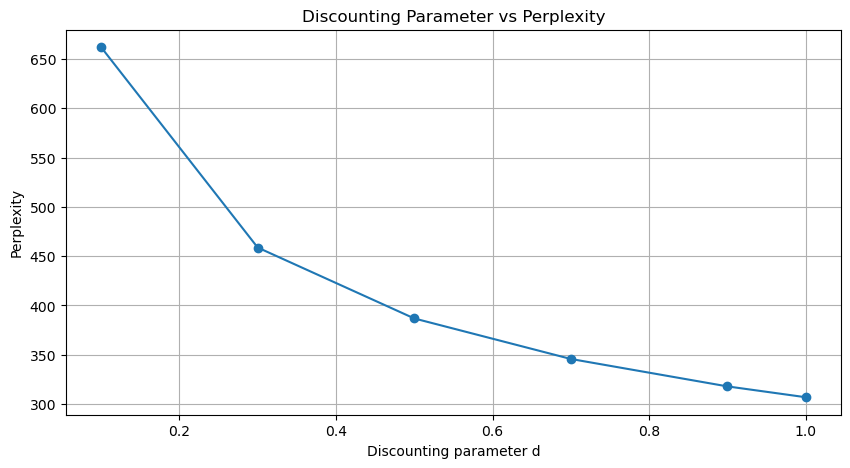

In [56]:
# Solution 3.e
# Plot the perplexity values for different d values

# ====================================
# Your code here
plt.figure(figsize=(10, 5))
plt.plot(d_values, pp_values, marker='o')
plt.xlabel('Discounting parameter d')
plt.ylabel('Perplexity')
plt.title('Discounting Parameter vs Perplexity')
plt.grid(True)
plt.show()
# ====================================

In [ ]:
# Solution 3.f

# Computing Perplexity on test set

# ====================================
# Your code here

# ====================================

In [ ]:
# Solution 3.g

# Computing d with approximate solution

# ====================================
# Your code here

# ====================================

# Computing Perplexity on test set
# with the optimal d value
# ====================================
# Your code here

# ====================================

##### Solution 3.h

## Bonus

## Bonus 1 - More Tokenizers (2 points)

Repeat Exercise 1, but with the following:

* Whitespace tokenizer (0.5 point)
* Another tokenizer of your choice (e.g. Wordpiece) (0.5 point)

a. How do they compare to BPE and Morfessor in terms of the tokenized output? (0.5 point)  
b. How do they compare to BPE and Morfessor in terms of the entropy of the tokenized text? Which one seems better now? (0.5 point)

----

In [25]:
tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
trainer = BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])
tokenizer.pre_tokenizer = Whitespace()
tokenizer.normalizer = Lowercase()
tokenizer.train(["data/moby_dick.txt"], trainer)
tokenizer.save("data/tokenizer_moby_dick.json")

# Load the trained tokenizer
moby_tokenizer = Tokenizer.from_file("data/tokenizer_moby_dick.json")

# Encode a sample text
output = moby_tokenizer.encode("Hello, y'all! How are you moby tokenizer you have been tokenize?")
print("Moby Tokenizer from Hugging Face:", output.tokens)

# Compute the entropy of the test text
test_text = open('data/burgess.txt').read().strip().lower()
bpe_entropy = ex1.compute_entropy(test_text, tokenizer)

print(f"BPE entropy: {bpe_entropy:.2f}")




Moby Tokenizer from Hugging Face: ['hell', 'o', ',', 'y', "'", 'all', '!', 'how', 'are', 'you', 'moby', 'token', 'izer', 'you', 'have', 'been', 'token', 'ize', '?']
BPE entropy: 8.21


In [26]:
from tokenizers.models import WordPiece
from tokenizers.trainers import WordPieceTrainer
# Train WordPiece model
# Using the default parameters is fine
# ====================================
# a, Training the WordPiece tokenizer on moby_dick
tokenizer = Tokenizer(WordPiece(unk_token="[UNK]"))
trainer = WordPieceTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])
tokenizer.pre_tokenizer = Whitespace()
tokenizer.normalizer = Lowercase()
tokenizer.train(["data/moby_dick.txt"], trainer)
tokenizer.save("data/tokenizer_moby_dick_wordpiece.json")

# Load the trained tokenizer
moby_tokenizer = Tokenizer.from_file("data/tokenizer_moby_dick_wordpiece.json")

# Encode a sample text
output = moby_tokenizer.encode("Hello, y'all! How are you moby tokenizer you have been tokenize?")
print("Moby Tokenizer with WordPiece:", output.tokens)


# Compute the entropy of the test text
test_text = open('data/burgess.txt').read().strip().lower()
wordpiece_entropy = ex1.compute_entropy(test_text, tokenizer)
print(f"wordpiece_entropy: {wordpiece_entropy:.2f}")




Moby Tokenizer with WordPiece: ['hell', '##o', ',', 'y', "'", 'all', '!', 'how', 'are', 'you', 'moby', 'token', '##izer', 'you', 'have', 'been', 'token', '##ize', '?']
wordpiece_entropy: 8.23


### (a)

BPE and WordPiece tokenizers both segment the text into subword units, but WordPiece tries to retain whole words whenever possible,but also breaks down some words into subword units with the '##' prefix indicating continuation of a subword while BPE may split words more aggressively.

Morfessor tokenizer seems to tokenize primarily based on characters and treats some words as subword units and whitespace simply splits the text based on whitespace characters, treating each word and punctuation mark as a separate token.

### (b)

BPE and Whitespace has the identical entropy (8.21) but morfessor tokenizer got the lowest entropy of 7.83 and the highest entropy is achieved by wordpiece which is 8.23
Lower entropy values indicate greater predictability and higher entropy values indicate greater unpredictability so in our case, Morfessor tokenizer may be considered better in terms of producing tokens with lower entropy, indicating greater predictability. 

## Bonus 2 - Back off! (1 points)

a. What is an problem with absolute discounting? (0.5 point)  
b. How can you fix it? Is there another back-off appraoch we can use? (0.5 point)

----

### (a)

The problem with absolute discounting is that it subtracts the same constant value from all non-zero counts, regardless of their actual frequencies which can lead to insufficient smoothing of low-frequency events and oversmoothing of high-frequency events, potentially underestimating their probabilities.

### (b)

Yes, there are other approaches that can be used to avoid the absolute discounting issue, such as Kneser-Ney smoothing which uses sophisticated count redistribution based on lower-order n-gram counts, avoiding oversmoothing and providing better smoothing for lower counts.